In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn streamlit joblib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost tensorflow



   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 3.7 MB/s eta 0:00:20
   - -------------------------------------- 1.8/72.0 MB 4.4 MB/s eta 0:00:17
   - -------------------------------------- 2.9/72.0 MB 4.7 MB/s eta 0:00:15
   -- ------------------------------------- 4.2/72.0 MB 4.9 MB/s eta 0:00:14
   -- ------------------------------------- 5.2/72.0 MB 5.2 MB/s eta 0:00:13
   --- ------------------------------------ 6.8/72.0 MB 5.2 MB/s eta 0:00:13
   ---- ----------------------------------- 8.1/72.0 MB 5.4 MB/s eta 0:00:12
   ----- ---------------------------------- 9.2/72.0 MB 5.3 MB/s eta 0:00:12
   ----- ---------------------------------- 10.5/72.0 MB 5.3 MB/s eta 0:00:12
   ------ --------------------------------- 11.8/72.0 MB 5.4 MB/s eta 0:00:12
   ------ --------------------------------- 12.6/72.0 MB 5.3 MB/s eta 0:00:12
   ------- -------------------------------- 13.9/72.0 MB 5.3 MB/s eta 0:00:11
 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [94]:
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Utilities
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print(" All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


 All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 1.26.4


In [95]:

# Method 1: Using ucimlrepo (recommended)
try:
    from ucimlrepo import fetch_ucirepo
    
    # Fetch dataset
    appliances_energy = fetch_ucirepo(id=374)
    
    # Get features and target
    X = appliances_energy.data.features
    y = appliances_energy.data.targets
    
    # Combine into one dataframe
    df = pd.concat([X, y], axis=1)
    
    print(" Dataset loaded successfully using ucimlrepo!")
    
except ImportError:
    print("ucimlrepo not installed. Install it with: !pip install ucimlrepo")
    print(" Alternative: Downloading from URL...")
    
    # Method 2: Direct CSV download (backup)
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
    df = pd.read_csv(url)
    print(" Dataset loaded from direct URL!")

print(f"\n Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f" Data covers: 4.5 months of energy consumption data")


 Dataset loaded successfully using ucimlrepo!

 Dataset shape: 19735 rows × 29 columns
 Data covers: 4.5 months of energy consumption data


In [96]:

print("INITIAL DATA EXPLORATION")

# Display first few rows
print("\n First 5 rows of the dataset:")
print(df.head())

print("\n Dataset Information:")
print(df.info())

print("\n Statistical Summary:")
print(df.describe())

print("\n Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

INITIAL DATA EXPLORATION

 First 5 rows of the dataset:
                 date  lights    T1  RH_1    T2  RH_2    T3  RH_3    T4  RH_4  \
0  2016-01-1117:00:00      30 19.89 47.60 19.20 44.79 19.79 44.73 19.00 45.57   
1  2016-01-1117:10:00      30 19.89 46.69 19.20 44.72 19.79 44.79 19.00 45.99   
2  2016-01-1117:20:00      30 19.89 46.30 19.20 44.63 19.79 44.93 18.93 45.89   
3  2016-01-1117:30:00      40 19.89 46.07 19.20 44.59 19.79 45.00 18.89 45.72   
4  2016-01-1117:40:00      40 19.89 46.33 19.20 44.53 19.79 45.00 18.89 45.53   

     T5  RH_5   T6  RH_6    T7  RH_7    T8  RH_8    T9  RH_9  T_out  \
0 17.17 55.20 7.03 84.26 17.20 41.63 18.20 48.90 17.03 45.53   6.60   
1 17.17 55.20 6.83 84.06 17.20 41.56 18.20 48.86 17.07 45.56   6.48   
2 17.17 55.09 6.56 83.16 17.20 41.43 18.20 48.73 17.00 45.50   6.37   
3 17.17 55.09 6.43 83.42 17.13 41.29 18.10 48.59 17.00 45.40   6.25   
4 17.20 55.09 6.37 84.89 17.20 41.23 18.10 48.59 17.00 45.40   6.13   

   Press_mm_hg  RH_out  Windsp

STEP 4: CHECKING FOR MISSING VALUES

 No missing values

Total missing values: 0


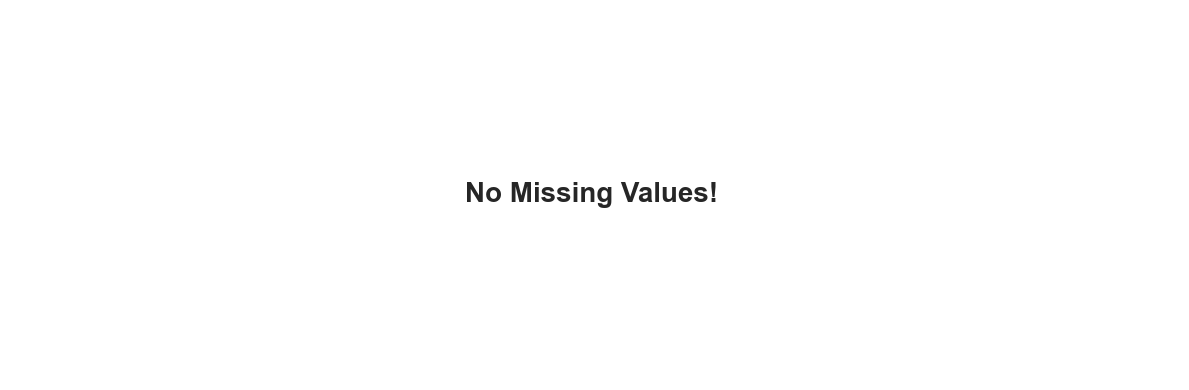

In [97]:
# #  Step 4: Data Cleaning - Check for Missing Values

print("STEP 4: CHECKING FOR MISSING VALUES")

# Check missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("\n Columns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n No missing values")
    
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Visualize missing values
plt.figure(figsize=(12, 4))
if df.isnull().sum().sum() > 0:
    sns.barplot(x=missing_df['Column'], y=missing_df['Percentage'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Percentage Missing (%)')
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No Missing Values! ', 
             ha='center', va='center', fontsize=20, fontweight='bold')
    plt.axis('off')
plt.tight_layout()
plt.savefig('01_missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

In [98]:
print(df.columns.tolist())


['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Appliances']


In [99]:
df.columns = df.columns.str.strip()  # removes spaces


In [100]:
print(df.columns.tolist())

['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Appliances']


In [101]:
df.rename(columns={'date ': 'date', 'Date': 'date'}, inplace=True)


STEP 5: PROCESSING DATE/TIME
Date column converted to datetime format

 Date range:
   Start: 2016-01-11 17:00:00
   End:   2016-05-27 18:00:00
   Duration: 137 days

 Created time-based features:
   - year, month, day, hour, minute
   - day_of_week (0=Mon, 6=Sun)
   - day_of_year, week_of_year
   - is_weekend (binary)
   - is_business_hours (binary)


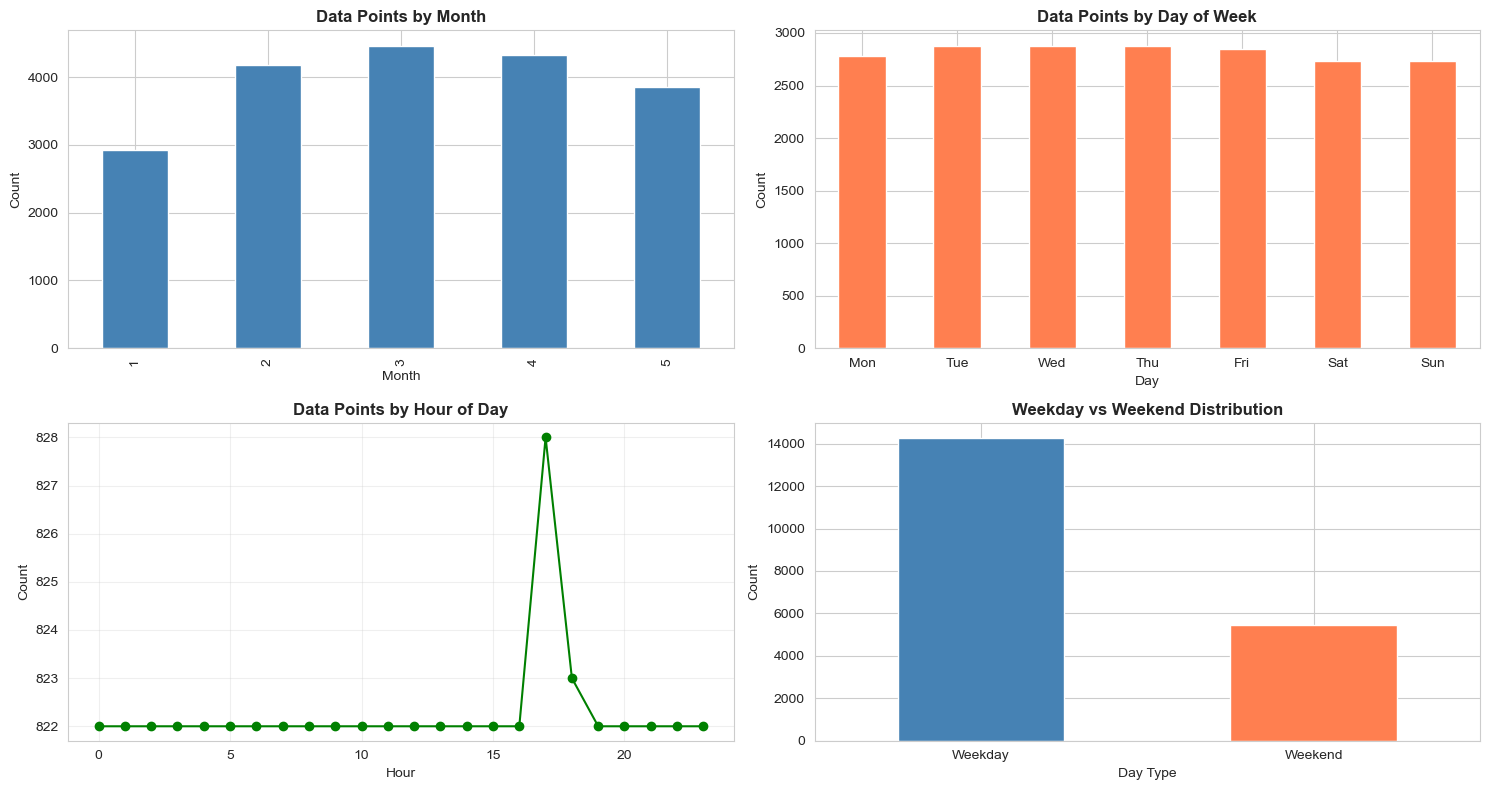

In [103]:
# # Step 5:Parse and Process Date/Time Column

# %%

print("STEP 5: PROCESSING DATE/TIME")


# Convert date column to datetime
# Fix malformed date strings
df['date'] = df['date'].str.replace(r'(\d{4}-\d{2}-\d{2})(\d{2}:\d{2}:\d{2})', r'\1 \2', regex=True)


df['date'] = pd.to_datetime(df['date'])

print("Date column converted to datetime format")
print(f"\n Date range:")
print(f"   Start: {df['date'].min()}")
print(f"   End:   {df['date'].max()}")
print(f"   Duration: {(df['date'].max() - df['date'].min()).days} days")

# Extract useful time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week

# Create additional helpful features
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['is_business_hours'] = ((df['hour'] >= 8) & (df['hour'] <= 18) & 
                            (df['is_weekend'] == 0)).astype(int)

print("\n Created time-based features:")
print("   - year, month, day, hour, minute")
print("   - day_of_week (0=Mon, 6=Sun)")
print("   - day_of_year, week_of_year")
print("   - is_weekend (binary)")
print("   - is_business_hours (binary)")

# Visualize data distribution over time
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Plot 1: Data points by month
df.groupby('month').size().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Data Points by Month', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Count')

# Plot 2: Data points by day of week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df.groupby('day_of_week').size().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_xticklabels(day_names, rotation=0)
axes[0, 1].set_title('Data Points by Day of Week', fontweight='bold')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Count')

# Plot 3: Data points by hour
df.groupby('hour').size().plot(kind='line', marker='o', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Data Points by Hour of Day', fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Weekend vs Weekday
df.groupby('is_weekend').size().plot(kind='bar', ax=axes[1, 1], color=['steelblue', 'coral'])
axes[1, 1].set_xticklabels(['Weekday', 'Weekend'], rotation=0)
axes[1, 1].set_title('Weekday vs Weekend Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Day Type')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('02_time_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [104]:
# #Step 6:Select and Rename Relevant Columns
# 
# For HVAC prediction, we'll focus on temperature, humidity, and energy data.
# Let's rename columns to be more intuitive.

# %%

print("STEP 6: SELECTING RELEVANT FEATURES")

# For HVAC prediction, we need:
# - Target: Appliances (energy consumption)
# - Indoor conditions: T1-T9 (temperatures), RH_1-RH_9 (humidity)
# - Outdoor conditions: T_out, RH_out, Pressure, Windspeed, Visibility, Tdewpoint
# - Time features: already created above

# Rename columns for clarity
column_mapping = {
    'Appliances': 'energy_consumption_wh',
    'lights': 'lights_energy_wh',
    'T1': 'kitchen_temp',
    'RH_1': 'kitchen_humidity',
    'T2': 'living_room_temp',
    'RH_2': 'living_room_humidity',
    'T3': 'laundry_temp',
    'RH_3': 'laundry_humidity',
    'T4': 'office_temp',
    'RH_4': 'office_humidity',
    'T5': 'bathroom_temp',
    'RH_5': 'bathroom_humidity',
    'T6': 'outside_north_temp',
    'RH_6': 'outside_north_humidity',
    'T7': 'ironing_room_temp',
    'RH_7': 'ironing_room_humidity',
    'T8': 'teenager_room_temp',
    'RH_8': 'teenager_room_humidity',
    'T9': 'parents_room_temp',
    'RH_9': 'parents_room_humidity',
    'T_out': 'outdoor_temp',
    'RH_out': 'outdoor_humidity',
    'Windspeed': 'wind_speed',
    'Visibility': 'visibility',
    'Tdewpoint': 'dew_point',
    'Press_mm_hg': 'pressure'
}

# Check which columns exist before renaming
existing_mappings = {k: v for k, v in column_mapping.items() if k in df.columns}
df.rename(columns=existing_mappings, inplace=True)

print(f" Renamed {len(existing_mappings)} columns for clarity")

# Create average indoor temperature and humidity
temp_cols = [col for col in df.columns if 'temp' in col and 'outdoor' not in col and 'outside' not in col and 'dew' not in col]
humidity_cols = [col for col in df.columns if 'humidity' in col and 'outdoor' not in col and 'outside' not in col]

df['avg_indoor_temp'] = df[temp_cols].mean(axis=1)
df['avg_indoor_humidity'] = df[humidity_cols].mean(axis=1)

print(f"\n Created aggregate features:")
print(f"   - avg_indoor_temp (average of {len(temp_cols)} sensors)")
print(f"   - avg_indoor_humidity (average of {len(humidity_cols)} sensors)")


STEP 6: SELECTING RELEVANT FEATURES
 Renamed 26 columns for clarity

 Created aggregate features:
   - avg_indoor_temp (average of 8 sensors)
   - avg_indoor_humidity (average of 8 sensors)


STEP 7: OUTLIER DETECTION

Outlier Analysis for Energy Consumption:
   Total data points: 19735
   Outliers found: 2138 (10.83%)
   Normal range: -25.00 to 175.00 Wh
   Min value: 10.00 Wh
   Max value: 1080.00 Wh


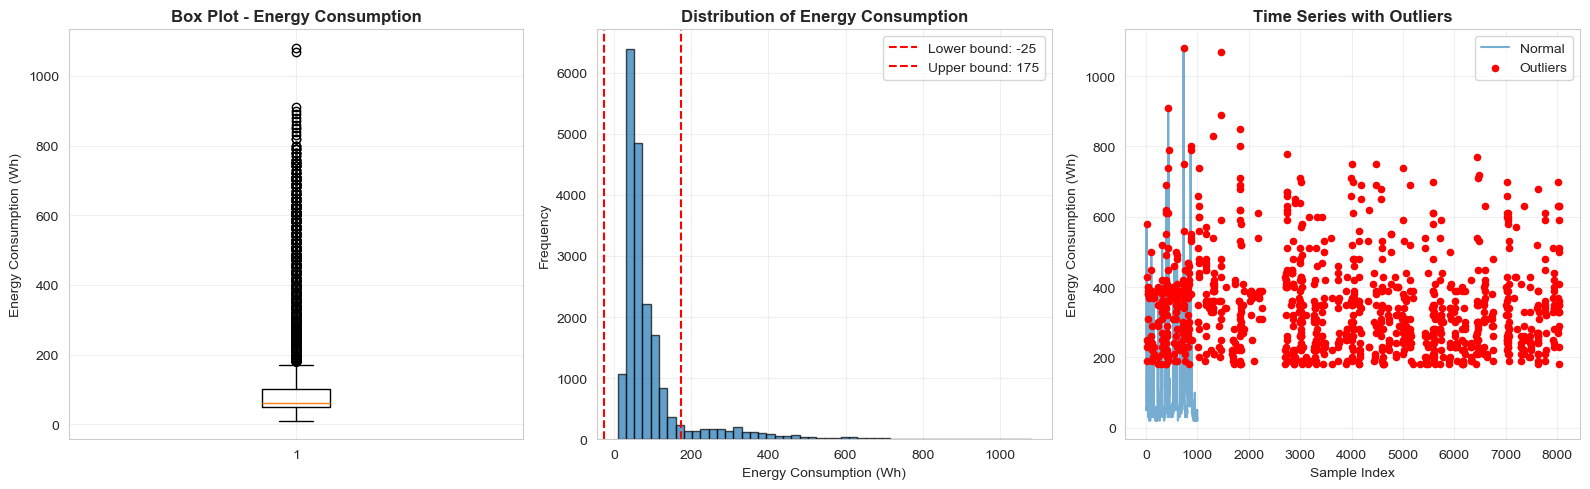


 Outlier Handling Strategy: CAPPING
   We'll cap extreme values to the IQR bounds to preserve data.
Capped 2138 outlier values


In [105]:
# #Step7:Detect and Handle Outliers

# %%

print("STEP 7: OUTLIER DETECTION")

def detect_outliers_iqr(data, column):
    """Detect outliers using Interquartile Range (IQR) method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in energy consumption
outliers, lower, upper = detect_outliers_iqr(df, 'energy_consumption_wh')

print(f"\nOutlier Analysis for Energy Consumption:")
print(f"   Total data points: {len(df)}")
print(f"   Outliers found: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"   Normal range: {lower:.2f} to {upper:.2f} Wh")
print(f"   Min value: {df['energy_consumption_wh'].min():.2f} Wh")
print(f"   Max value: {df['energy_consumption_wh'].max():.2f} Wh")

# Visualize outliers
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Box plot
axes[0].boxplot(df['energy_consumption_wh'])
axes[0].set_ylabel('Energy Consumption (Wh)')
axes[0].set_title('Box Plot - Energy Consumption', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(df['energy_consumption_wh'], bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(lower, color='r', linestyle='--', label=f'Lower bound: {lower:.0f}')
axes[1].axvline(upper, color='r', linestyle='--', label=f'Upper bound: {upper:.0f}')
axes[1].set_xlabel('Energy Consumption (Wh)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Energy Consumption', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Time series with outliers highlighted
sample_size = min(1000, len(df))
axes[2].plot(range(sample_size), df['energy_consumption_wh'][:sample_size], 
             alpha=0.6, label='Normal')
outlier_indices = outliers.index[:sample_size]
if len(outlier_indices) > 0:
    axes[2].scatter(outlier_indices, df.loc[outlier_indices, 'energy_consumption_wh'], 
                   color='red', s=20, label='Outliers', zorder=5)
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Energy Consumption (Wh)')
axes[2].set_title('Time Series with Outliers', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('03_outlier_detection.png', dpi=150, bbox_inches='tight')
plt.show()

# Decision: Cap outliers instead of removing them
print("\n Outlier Handling Strategy: CAPPING")
print("   We'll cap extreme values to the IQR bounds to preserve data.")

df['energy_consumption_wh_original'] = df['energy_consumption_wh'].copy()
df['energy_consumption_wh'] = df['energy_consumption_wh'].clip(lower=lower, upper=upper)

capped_count = (df['energy_consumption_wh'] != df['energy_consumption_wh_original']).sum()
print(f"Capped {capped_count} outlier values")

In [106]:
# # Step 8: Feature Engineering - Create Lag and Rolling Features

# %%

print("STEP 8: FEATURE ENGINEERING")


# Sort by date to ensure correct time series order
df = df.sort_values('date').reset_index(drop=True)
print(" Data sorted by timestamp")

# Create lag features (previous values)
print("\n Creating lag features...")
df['energy_lag_10min'] = df['energy_consumption_wh'].shift(1)  # 10 min ago
df['energy_lag_1hour'] = df['energy_consumption_wh'].shift(6)  # 1 hour ago (6 * 10min)
df['energy_lag_24hour'] = df['energy_consumption_wh'].shift(144)  # 24 hours ago (144 * 10min)

print(" Created lag features:")
print("   - energy_lag_10min (previous 10 minutes)")
print("   - energy_lag_1hour (1 hour ago)")
print("   - energy_lag_24hour (24 hours ago)")

# Create rolling window features
print("\n Creating rolling window features...")
df['energy_rolling_mean_1hour'] = df['energy_consumption_wh'].rolling(window=6, min_periods=1).mean()
df['energy_rolling_mean_3hour'] = df['energy_consumption_wh'].rolling(window=18, min_periods=1).mean()
df['energy_rolling_std_1hour'] = df['energy_consumption_wh'].rolling(window=6, min_periods=1).std()

print("Created rolling features:")
print("   - energy_rolling_mean_1hour (1-hour average)")
print("   - energy_rolling_mean_3hour (3-hour average)")
print("   - energy_rolling_std_1hour (1-hour standard deviation)")

# Create temperature difference features
print("\n Creating temperature-based features...")
df['temp_difference'] = df['avg_indoor_temp'] - df['outdoor_temp']
df['cooling_degree_hour'] = np.maximum(0, df['outdoor_temp'] - 18)  # Base 18°C
df['heating_degree_hour'] = np.maximum(0, 18 - df['outdoor_temp'])

print(" Created temperature features:")
print("   - temp_difference (indoor - outdoor)")
print("   - cooling_degree_hour (cooling needs)")
print("   - heating_degree_hour (heating needs)")

# Create interaction features
print("\n Creating interaction features...")
df['temp_humidity_interaction'] = df['outdoor_temp'] * df['outdoor_humidity']
df['wind_temp_interaction'] = df['wind_speed'] * df['outdoor_temp']

print("Created interaction features")

# Remove rows with NaN from lag features
rows_before = len(df)
df = df.dropna()
rows_after = len(df)
print(f"\n Removed {rows_before - rows_after} rows with NaN from lag features")
print(f"   Remaining rows: {rows_after}")

STEP 8: FEATURE ENGINEERING
 Data sorted by timestamp

 Creating lag features...
 Created lag features:
   - energy_lag_10min (previous 10 minutes)
   - energy_lag_1hour (1 hour ago)
   - energy_lag_24hour (24 hours ago)

 Creating rolling window features...
Created rolling features:
   - energy_rolling_mean_1hour (1-hour average)
   - energy_rolling_mean_3hour (3-hour average)
   - energy_rolling_std_1hour (1-hour standard deviation)

 Creating temperature-based features...
 Created temperature features:
   - temp_difference (indoor - outdoor)
   - cooling_degree_hour (cooling needs)
   - heating_degree_hour (heating needs)

 Creating interaction features...
Created interaction features

 Removed 144 rows with NaN from lag features
   Remaining rows: 19591


STEP 9: EXPLORATORY DATA ANALYSIS

 Energy Consumption Statistics:
   Mean: 78.89 Wh
   Median: 60.00 Wh
   Std Dev: 42.91 Wh
   Min: 10.00 Wh
   Max: 175.00 Wh

 Energy Consumption Patterns:

By Hour of Day:
      mean   std  count
hour                   
0    51.54 13.80    816
1    50.47 10.53    816
2    49.11 10.72    816
3    48.33 11.38    816
4    49.39 10.25    816
5    51.80 18.60    816
6    54.67 23.85    816
7    66.75 36.03    816
8    81.81 47.47    816
9    85.91 47.14    816

By Day of Week:
     mean   std  count
Mon 82.92 46.28   2736
Tue 73.24 40.54   2778
Wed 78.31 39.27   2880
Thu 74.70 40.64   2880
Fri 79.45 47.12   2845
Sat 83.68 44.45   2736
Sun 80.22 40.51   2736


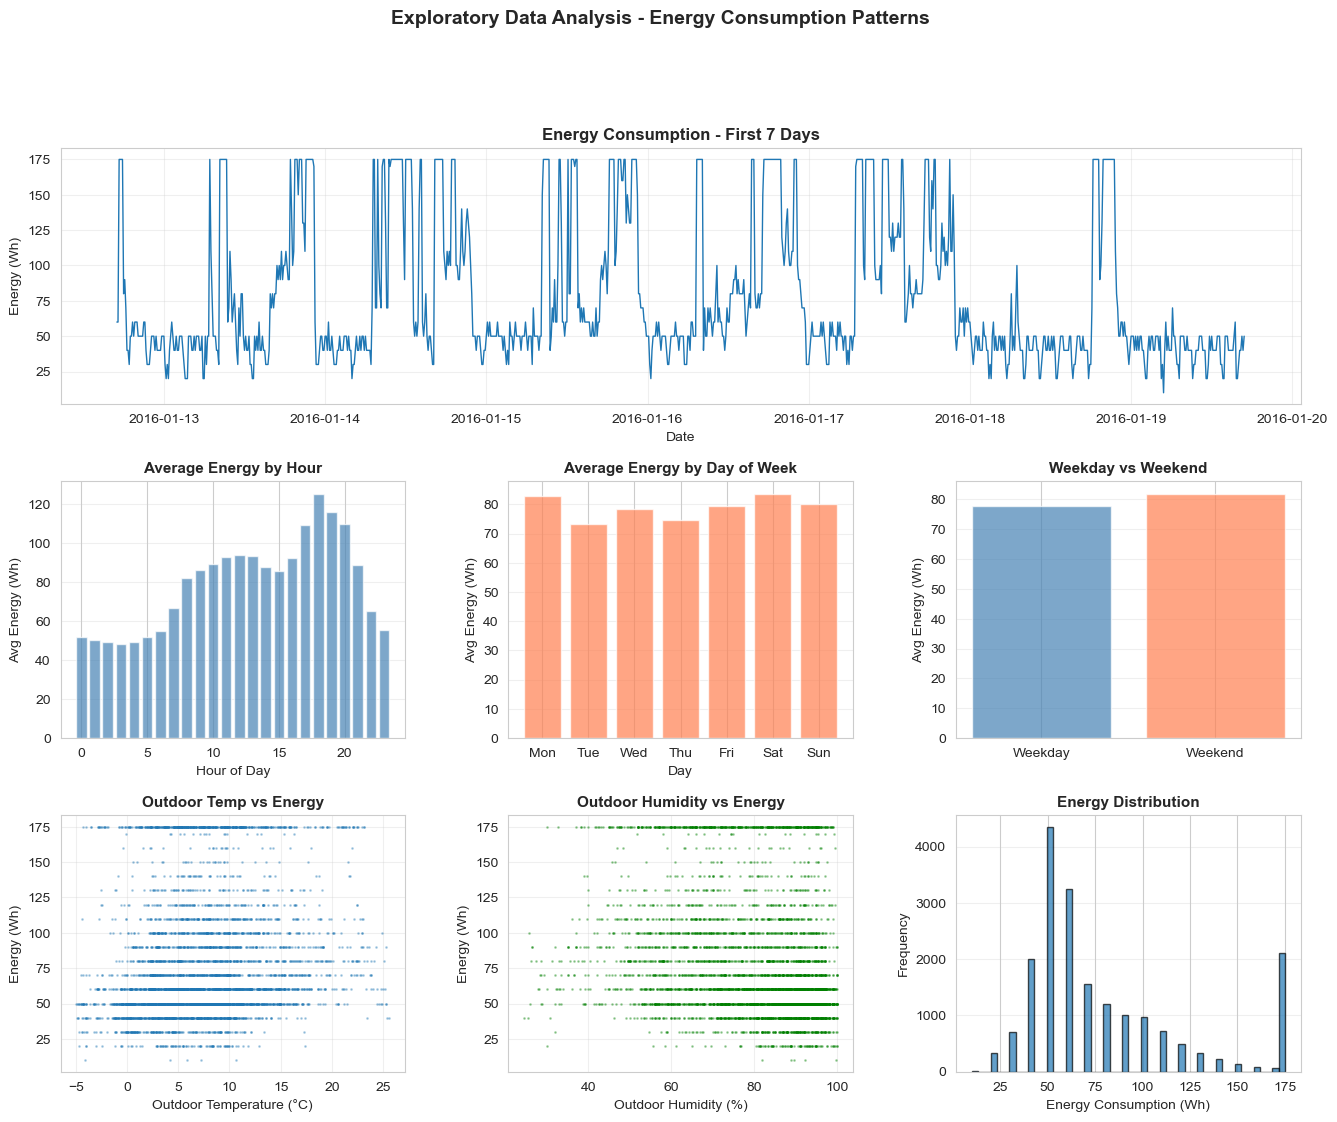

In [107]:
# # Step 9:Exploratory Data Analysis

# %%
print("STEP 9: EXPLORATORY DATA ANALYSIS")

# Energy consumption statistics
print("\n Energy Consumption Statistics:")
print(f"   Mean: {df['energy_consumption_wh'].mean():.2f} Wh")
print(f"   Median: {df['energy_consumption_wh'].median():.2f} Wh")
print(f"   Std Dev: {df['energy_consumption_wh'].std():.2f} Wh")
print(f"   Min: {df['energy_consumption_wh'].min():.2f} Wh")
print(f"   Max: {df['energy_consumption_wh'].max():.2f} Wh")

# Analyze patterns
print("\n Energy Consumption Patterns:")
print("\nBy Hour of Day:")
hourly_avg = df.groupby('hour')['energy_consumption_wh'].agg(['mean', 'std', 'count'])
print(hourly_avg.head(10))

print("\nBy Day of Week:")
weekly_avg = df.groupby('day_of_week')['energy_consumption_wh'].agg(['mean', 'std', 'count'])
weekly_avg.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
print(weekly_avg)

# Create comprehensive EDA visualizations
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Energy consumption over time (sample)
ax1 = fig.add_subplot(gs[0, :])
sample_days = 7
sample_data = df[df['date'] < df['date'].min() + timedelta(days=sample_days)]
ax1.plot(sample_data['date'], sample_data['energy_consumption_wh'], linewidth=1)
ax1.set_title(f'Energy Consumption - First {sample_days} Days', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy (Wh)')
ax1.grid(True, alpha=0.3)

# Plot 2: Hourly pattern
ax2 = fig.add_subplot(gs[1, 0])
hourly_mean = df.groupby('hour')['energy_consumption_wh'].mean()
ax2.bar(hourly_mean.index, hourly_mean.values, color='steelblue', alpha=0.7)
ax2.set_title('Average Energy by Hour', fontsize=11, fontweight='bold')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Avg Energy (Wh)')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Day of week pattern
ax3 = fig.add_subplot(gs[1, 1])
daily_mean = df.groupby('day_of_week')['energy_consumption_wh'].mean()
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax3.bar(range(7), daily_mean.values, color='coral', alpha=0.7)
ax3.set_xticks(range(7))
ax3.set_xticklabels(day_labels)
ax3.set_title('Average Energy by Day of Week', fontsize=11, fontweight='bold')
ax3.set_xlabel('Day')
ax3.set_ylabel('Avg Energy (Wh)')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Weekend vs Weekday
ax4 = fig.add_subplot(gs[1, 2])
weekend_data = df.groupby('is_weekend')['energy_consumption_wh'].mean()
ax4.bar(['Weekday', 'Weekend'], weekend_data.values, color=['steelblue', 'coral'], alpha=0.7)
ax4.set_title('Weekday vs Weekend', fontsize=11, fontweight='bold')
ax4.set_ylabel('Avg Energy (Wh)')
ax4.grid(axis='y', alpha=0.3)

# Plot 5: Temperature vs Energy
ax5 = fig.add_subplot(gs[2, 0])
sample_scatter = df.sample(min(5000, len(df)))
ax5.scatter(sample_scatter['outdoor_temp'], sample_scatter['energy_consumption_wh'], 
            alpha=0.3, s=1)
ax5.set_title('Outdoor Temp vs Energy', fontsize=11, fontweight='bold')
ax5.set_xlabel('Outdoor Temperature (°C)')
ax5.set_ylabel('Energy (Wh)')
ax5.grid(True, alpha=0.3)

# Plot 6: Humidity vs Energy
ax6 = fig.add_subplot(gs[2, 1])
ax6.scatter(sample_scatter['outdoor_humidity'], sample_scatter['energy_consumption_wh'], 
            alpha=0.3, s=1, color='green')
ax6.set_title('Outdoor Humidity vs Energy', fontsize=11, fontweight='bold')
ax6.set_xlabel('Outdoor Humidity (%)')
ax6.set_ylabel('Energy (Wh)')
ax6.grid(True, alpha=0.3)

# Plot 7: Energy distribution
ax7 = fig.add_subplot(gs[2, 2])
ax7.hist(df['energy_consumption_wh'], bins=50, edgecolor='black', alpha=0.7)
ax7.set_title('Energy Distribution', fontsize=11, fontweight='bold')
ax7.set_xlabel('Energy Consumption (Wh)')
ax7.set_ylabel('Frequency')
ax7.grid(axis='y', alpha=0.3)

plt.suptitle('Exploratory Data Analysis - Energy Consumption Patterns', 
             fontsize=14, fontweight='bold', y=0.995)
plt.savefig('04_eda_comprehensive.png', dpi=150, bbox_inches='tight')
plt.show()

STEP 10: CORRELATION ANALYSIS

Top 15 Features Correlated with Energy Consumption:
energy_consumption_wh       1.00
energy_lag_10min            0.84
energy_rolling_mean_1hour   0.84
energy_rolling_mean_3hour   0.70
energy_lag_1hour            0.55
energy_rolling_std_1hour    0.45
energy_lag_24hour           0.39
hour                        0.35
lights_energy_wh            0.27
living_room_temp            0.21
is_business_hours           0.20
outside_north_temp          0.19
outdoor_temp                0.17
wind_temp_interaction       0.17
laundry_temp                0.15
Name: energy_consumption_wh, dtype: float64

Bottom 10 Features (Negative Correlation):
avg_indoor_humidity      -0.05
pressure                 -0.07
living_room_humidity     -0.09
ironing_room_humidity    -0.10
parents_room_humidity    -0.12
temp_difference          -0.16
outside_north_humidity   -0.16
teenager_room_humidity   -0.17
heating_degree_hour      -0.17
outdoor_humidity         -0.23
Name: energy_consumption

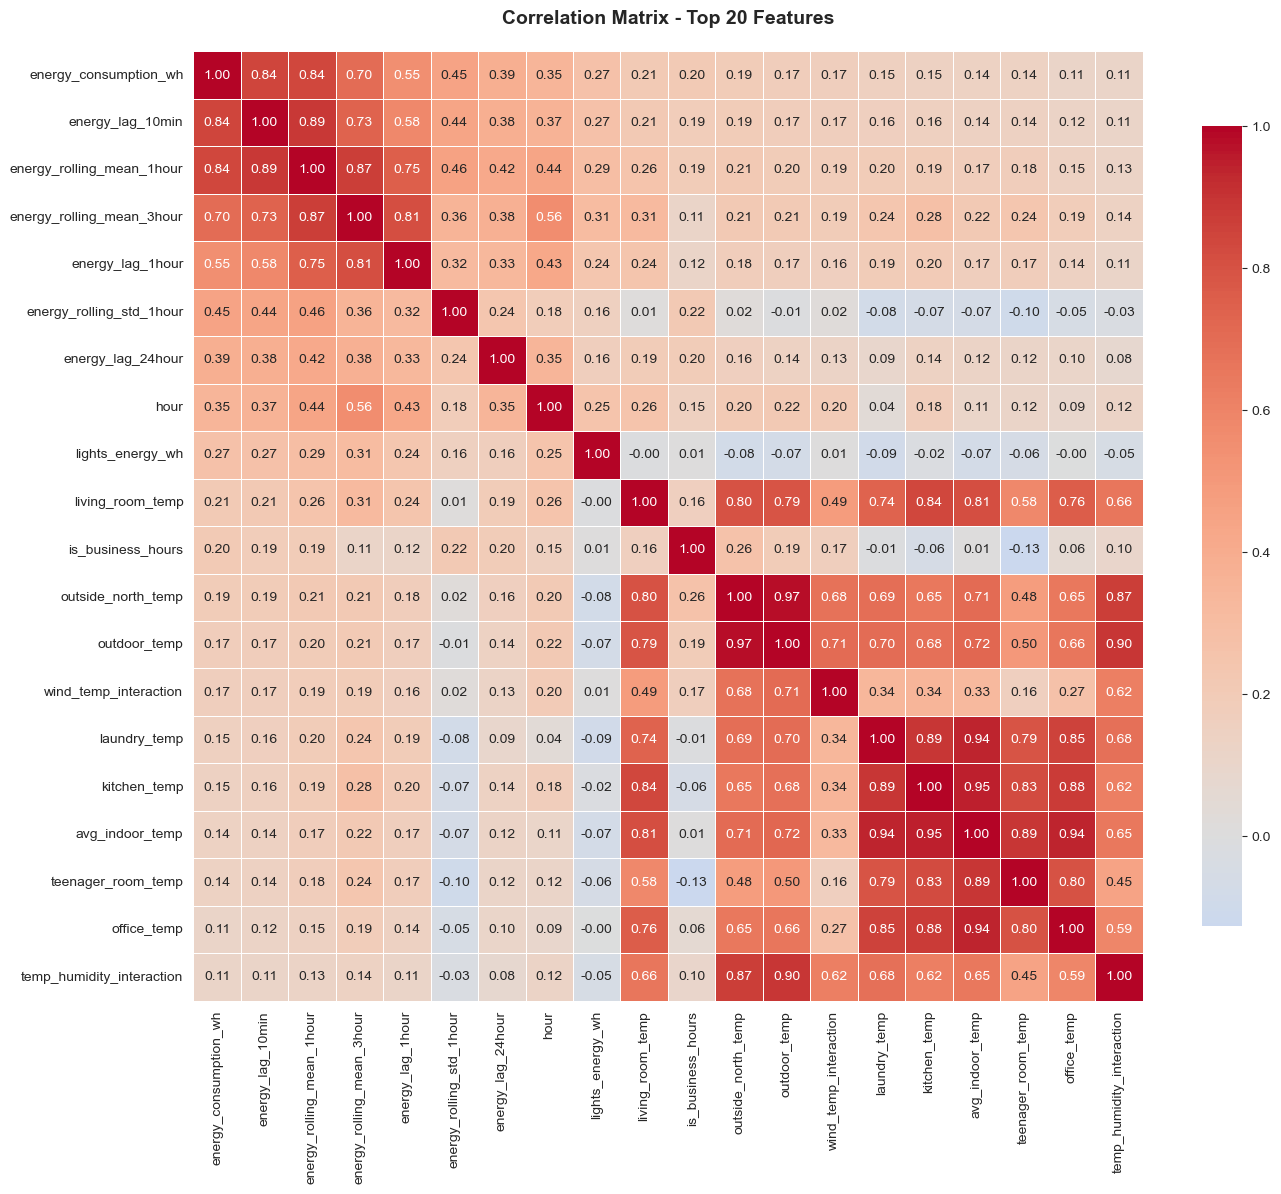

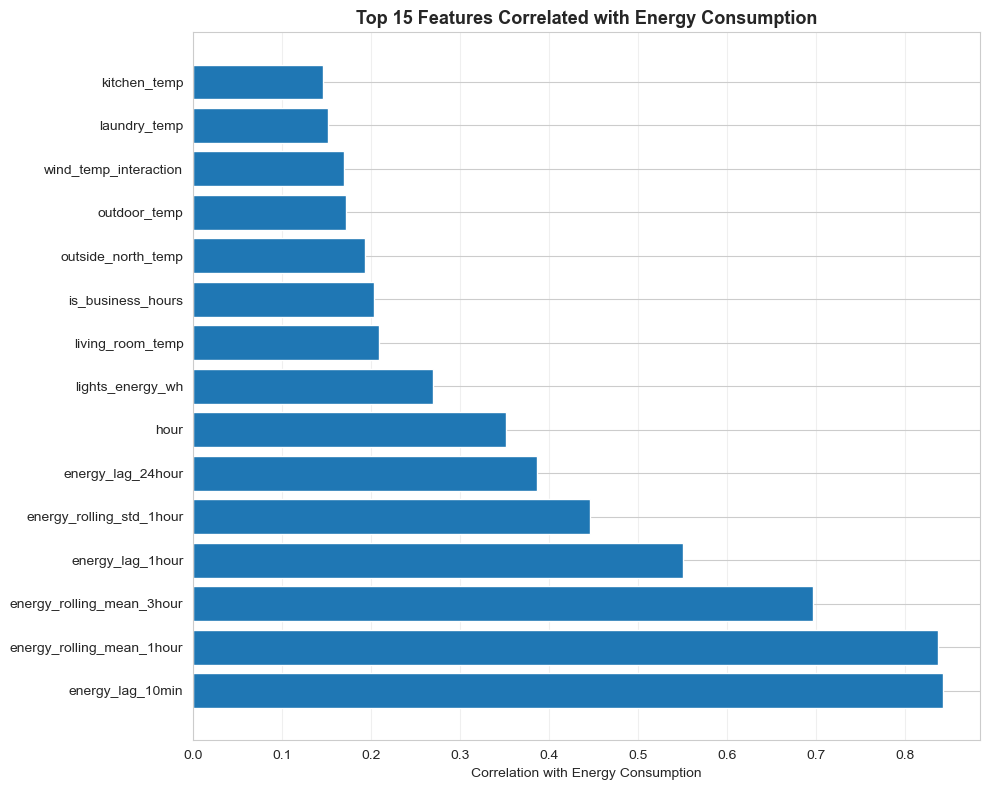

In [108]:
# # Step 10:Correlation Analysis

# %%

print("STEP 10: CORRELATION ANALYSIS")


# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove unnecessary columns
exclude_cols = ['year', 'month', 'day', 'minute', 'day_of_year', 'week_of_year', 
                'energy_consumption_wh_original']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Calculate correlation with target
correlations = df[numerical_cols].corr()['energy_consumption_wh'].sort_values(ascending=False)

print("\nTop 15 Features Correlated with Energy Consumption:")
print(correlations.head(15))

print("\nBottom 10 Features (Negative Correlation):")
print(correlations.tail(10))

# Visualize correlation matrix (top features only)
top_features = correlations.head(20).index.tolist()
correlation_matrix = df[top_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 20 Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('05_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# Correlation bar plot
plt.figure(figsize=(10, 8))
top_corr = correlations[1:16]  # Exclude self-correlation
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation with Energy Consumption')
plt.title('Top 15 Features Correlated with Energy Consumption', fontsize=13, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('06_feature_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

In [109]:
# #Step 11:Feature Selection for ML Models

# %%

print("STEP 11: FEATURE SELECTION")


# Define features for modeling
selected_features = [
    # Time features
    'hour', 'day_of_week', 'month', 'is_weekend', 'is_business_hours',
    
    # Temperature features
    'avg_indoor_temp', 'outdoor_temp', 'temp_difference',
    'cooling_degree_hour', 'heating_degree_hour',
    
    # Humidity features
    'avg_indoor_humidity', 'outdoor_humidity',
    
    # Weather features
    'pressure', 'wind_speed', 'visibility', 'dew_point',
    
    # Lag features
    'energy_lag_10min', 'energy_lag_1hour', 'energy_lag_24hour',
    
    # Rolling features
    'energy_rolling_mean_1hour', 'energy_rolling_mean_3hour',
    'energy_rolling_std_1hour',
    
    # Interaction features
    'temp_humidity_interaction', 'wind_temp_interaction'
]

# Verify all features exist
missing_features = [f for f in selected_features if f not in df.columns]
if missing_features:
    print(f" Warning: These features don't exist: {missing_features}")
    selected_features = [f for f in selected_features if f in df.columns]

print(f" Selected {len(selected_features)} features for modeling:")
for i, feature in enumerate(selected_features, 1):
    print(f"   {i:2d}. {feature}")

# Create feature matrix X and target vector y
X = df[selected_features].copy()
y = df['energy_consumption_wh'].copy()

print(f"\n Final Dataset Shape:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")


STEP 11: FEATURE SELECTION
 Selected 24 features for modeling:
    1. hour
    2. day_of_week
    3. month
    4. is_weekend
    5. is_business_hours
    6. avg_indoor_temp
    7. outdoor_temp
    8. temp_difference
    9. cooling_degree_hour
   10. heating_degree_hour
   11. avg_indoor_humidity
   12. outdoor_humidity
   13. pressure
   14. wind_speed
   15. visibility
   16. dew_point
   17. energy_lag_10min
   18. energy_lag_1hour
   19. energy_lag_24hour
   20. energy_rolling_mean_1hour
   21. energy_rolling_mean_3hour
   22. energy_rolling_std_1hour
   23. temp_humidity_interaction
   24. wind_temp_interaction

 Final Dataset Shape:
   Features (X): (19591, 24)
   Target (y): (19591,)


STEP 12: FEATURE SCALING

 Feature Statistics Before Scaling:
                            mean    std     min     max
hour                       11.50   6.92    0.00   23.00
day_of_week                 2.99   1.98    0.00    6.00
month                       3.12   1.33    1.00    5.00
is_weekend                  0.28   0.45    0.00    1.00
is_business_hours           0.33   0.47    0.00    1.00
avg_indoor_temp            20.83   1.81   16.01   26.06
outdoor_temp                7.42   5.34   -5.00   26.10
temp_difference            13.40   4.22   -1.28   24.17
cooling_degree_hour         0.12   0.71    0.00    8.10
heating_degree_hour        10.70   5.04    0.00   23.00
avg_indoor_humidity        41.18   3.96   30.84   53.95
outdoor_humidity           79.69  14.93   24.00  100.00
pressure                  755.64   7.29  729.30  772.30
wind_speed                  4.03   2.46    0.00   14.00
visibility                 38.33  11.83    1.00   66.00
dew_point                   3.76   4.21   

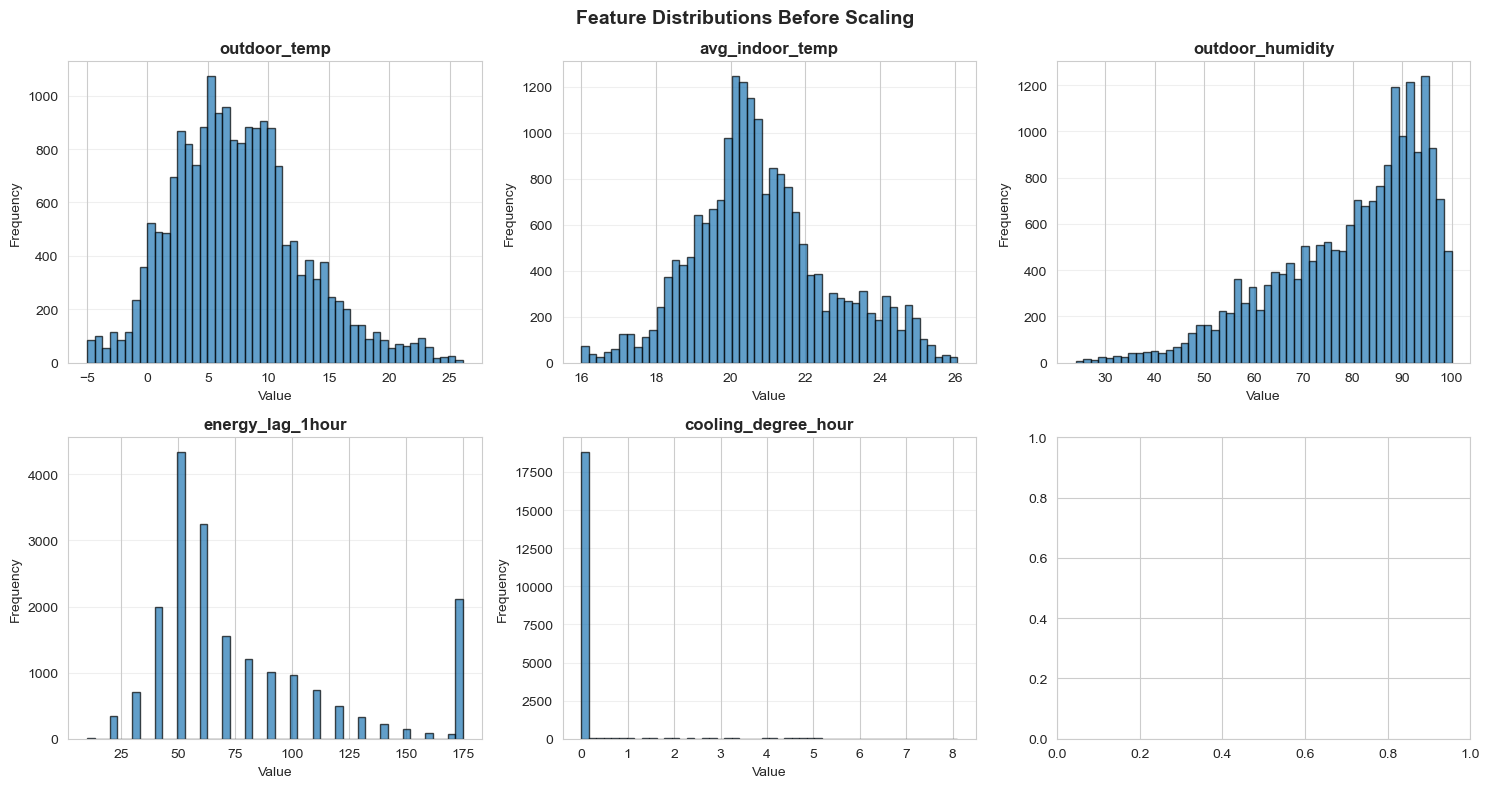


 Note: We'll scale features after train-test split to avoid data leakage!


In [110]:
# # Step 12:Feature Scaling (Normalization)

# %%

print("STEP 12: FEATURE SCALING")


from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Note: We'll scale AFTER train-test split to prevent data leakage
# For now, let's just examine the feature distributions

print("\n Feature Statistics Before Scaling:")
print(X.describe().T[['mean', 'std', 'min', 'max']])

# Visualize feature distributions (sample of features)
sample_features = ['outdoor_temp', 'avg_indoor_temp', 'outdoor_humidity', 
                   'energy_lag_1hour', 'cooling_degree_hour']
sample_features = [f for f in sample_features if f in X.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(sample_features[:6]):
    if feature in X.columns:
        axes[idx].hist(X[feature], bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{feature}', fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Feature Distributions Before Scaling', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('07_feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Note: We'll scale features after train-test split to avoid data leakage!")


STEP 13: TRAIN-VALIDATION-TEST SPLIT
 Data split completed:
   Training set:   13,713 samples (70.0%)
   Validation set: 2,939 samples (15.0%)
   Test set:       2,939 samples (15.0%)
   Total:          19,591 samples


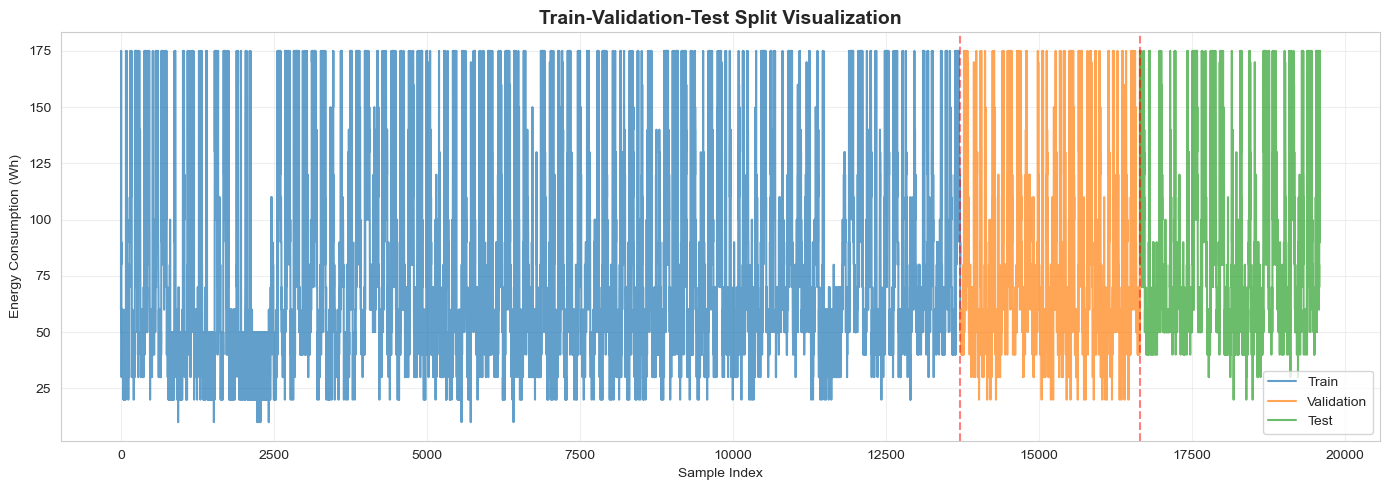

In [111]:
# # Step 13:Train-Test Split

# %%

print("STEP 13: TRAIN-VALIDATION-TEST SPLIT")


from sklearn.model_selection import train_test_split

# Split strategy: 70% train, 15% validation, 15% test
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=False  # shuffle=False for time series
)

# Second split: Split temp into validation and test (50-50)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, shuffle=False
)

print(" Data split completed:")
print(f"   Training set:   {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Validation set: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"   Test set:       {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"   Total:          {len(X):,} samples")

# Visualize the split
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_train)), y_train.values, label='Train', alpha=0.7)
plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val.values, 
         label='Validation', alpha=0.7)
plt.plot(range(len(y_train) + len(y_val), len(y)), y_test.values, 
         label='Test', alpha=0.7)
plt.axvline(x=len(y_train), color='red', linestyle='--', alpha=0.5)
plt.axvline(x=len(y_train) + len(y_val), color='red', linestyle='--', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Train-Validation-Test Split Visualization', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('08_train_test_split.png', dpi=150, bbox_inches='tight')
plt.show()


STEP 14: SCALING FEATURES
Feature scaling completed using StandardScaler
   - Fit on training data only
   - Applied to train, validation, and test sets
   - All features now have mean ≈ 0 and std ≈ 1

 Scaled Training Data Statistics:
                     mean  std   min   max
hour                -0.00 1.00 -1.66  1.66
day_of_week         -0.00 1.00 -1.53  1.51
month               -0.00 1.00 -1.47  1.55
is_weekend           0.00 1.00 -0.63  1.59
is_business_hours   -0.00 1.00 -0.70  1.43
avg_indoor_temp      0.00 1.00 -3.22  2.27
outdoor_temp         0.00 1.00 -2.57  3.35
temp_difference      0.00 1.00 -3.26  2.66
cooling_degree_hour  0.00 1.00 -0.04 38.13
heating_degree_hour -0.00 1.00 -2.95  2.58


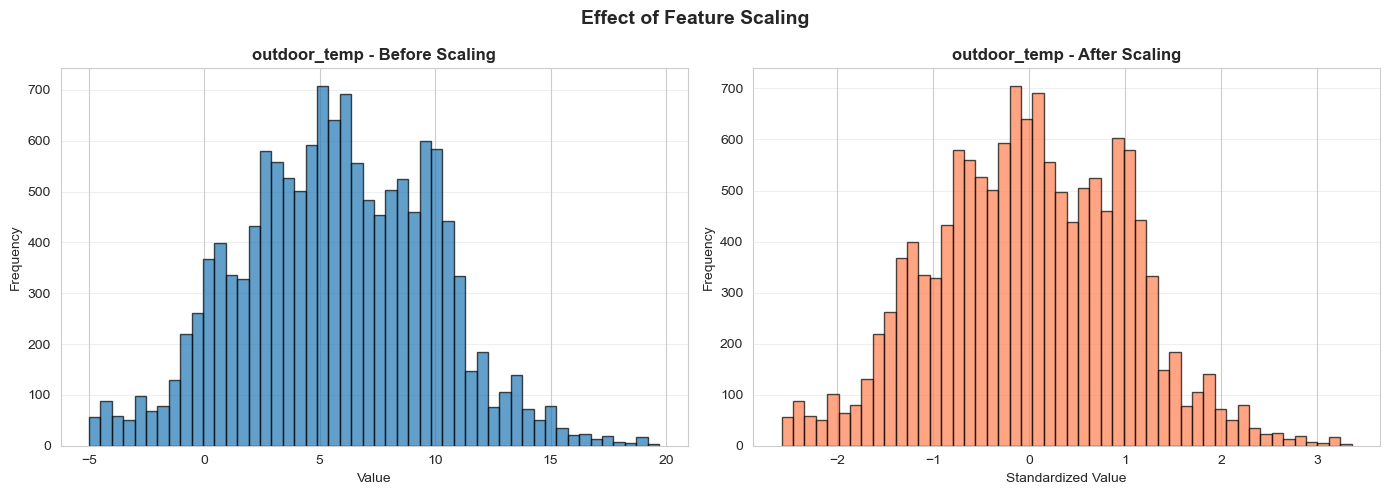

In [112]:
# #Step 14:Scale Features (After Split)

# %%
print("STEP 14: SCALING FEATURES")


# Fit scaler on training data ONLY
scaler = StandardScaler()
scaler.fit(X_train)

# Transform all sets using the same scaler
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed using StandardScaler")
print("   - Fit on training data only")
print("   - Applied to train, validation, and test sets")
print(f"   - All features now have mean ≈ 0 and std ≈ 1")

print("\n Scaled Training Data Statistics:")
print(X_train_scaled.describe().T[['mean', 'std', 'min', 'max']].head(10))

# Visualize scaling effect
sample_feature = 'outdoor_temp' if 'outdoor_temp' in X.columns else X.columns[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].hist(X_train[sample_feature], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title(f'{sample_feature} - Before Scaling', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.3)

# After scaling
axes[1].hist(X_train_scaled[sample_feature], bins=50, edgecolor='black', 
             alpha=0.7, color='coral')
axes[1].set_title(f'{sample_feature} - After Scaling', fontweight='bold')
axes[1].set_xlabel('Standardized Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Effect of Feature Scaling', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('09_scaling_effect.png', dpi=150, bbox_inches='tight')
plt.show()

In [113]:
# # Step 15:Save Preprocessed Data


print("STEP 15: SAVING PREPROCESSED DATA")

import joblib
import os

# Create output directory
output_dir = 'preprocessed_data'
os.makedirs(output_dir, exist_ok=True)

# Save scaled datasets as NumPy arrays (for ML models)
np.save(f'{output_dir}/X_train_scaled.npy', X_train_scaled.values)
np.save(f'{output_dir}/X_val_scaled.npy', X_val_scaled.values)
np.save(f'{output_dir}/X_test_scaled.npy', X_test_scaled.values)
np.save(f'{output_dir}/y_train.npy', y_train.values)
np.save(f'{output_dir}/y_val.npy', y_val.values)
np.save(f'{output_dir}/y_test.npy', y_test.values)
print("Saved train/val/test splits as .npy files")

# Save unscaled datasets as CSV (for reference)
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_val.to_csv(f'{output_dir}/X_val.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False, header=['energy_consumption_wh'])
y_val.to_csv(f'{output_dir}/y_val.csv', index=False, header=['energy_consumption_wh'])
y_test.to_csv(f'{output_dir}/y_test.csv', index=False, header=['energy_consumption_wh'])
print("Saved train/val/test splits as .csv files")

# Save the scaler (VERY IMPORTANT for predictions!)
joblib.dump(scaler, f'{output_dir}/scaler.pkl')
print("Saved scaler object")

# Save feature names
joblib.dump(selected_features, f'{output_dir}/feature_names.pkl')
print("Saved feature names")

# Save complete processed dataframe
df.to_csv(f'{output_dir}/complete_processed_data.csv', index=False)
print("Saved complete processed dataset")

# Save preprocessing metadata
metadata = {
    'total_samples': len(df),
    'train_samples': len(X_train),
    'val_samples': len(X_val),
    'test_samples': len(X_test),
    'num_features': len(selected_features),
    'feature_names': selected_features,
    'target_name': 'energy_consumption_wh',
    'date_range': {
        'start': str(df['date'].min()),
        'end': str(df['date'].max())
    },
    'preprocessing_steps': [
        'Loaded UCI Appliances Energy dataset',
        'Parsed datetime and created time features',
        'Handled outliers using IQR method',
        'Created lag features (10min, 1h, 24h)',
        'Created rolling window features',
        'Created temperature and interaction features',
        'Removed NaN values from lag features',
        'Applied StandardScaler normalization',
        '70-15-15 train-val-test split'
    ]
}

import json
with open(f'{output_dir}/preprocessing_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)
print("Saved preprocessing metadata")

print(f"\n All files saved to: {output_dir}/")
print("\nSaved files:")
for file in os.listdir(output_dir):
    file_path = os.path.join(output_dir, file)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"   - {file:35s} ({size_mb:.2f} MB)")


STEP 15: SAVING PREPROCESSED DATA
Saved train/val/test splits as .npy files
Saved train/val/test splits as .csv files
Saved scaler object
Saved feature names
Saved complete processed dataset
Saved preprocessing metadata

 All files saved to: preprocessed_data/

Saved files:
   - complete_processed_data.csv         (7.53 MB)
   - feature_names.pkl                   (0.00 MB)
   - preprocessing_metadata.json         (0.00 MB)
   - scaler.pkl                          (0.00 MB)
   - X_test.csv                          (0.57 MB)
   - X_test_scaled.npy                   (0.54 MB)
   - X_train.csv                         (2.59 MB)
   - X_train_scaled.npy                  (2.51 MB)
   - X_val.csv                           (0.56 MB)
   - X_val_scaled.npy                    (0.54 MB)
   - y_test.csv                          (0.01 MB)
   - y_test.npy                          (0.02 MB)
   - y_train.csv                         (0.06 MB)
   - y_train.npy                         (0.10 MB)
   - y_val.

In [114]:
type(y)

pandas.core.series.Series

In [115]:
# Step 16: Data Quality Report
# %%

print("FINAL DATA QUALITY REPORT")


# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])  # drop invalid dates if any

print("Dataset Summary:")
print(f"Original rows: {len(df):,}")

if 'X' in locals():
    print(f"Final rows: {len(X):,}")
else:
    print("X (feature matrix) not defined in this session.")

if 'date' in df.columns:
    print(f"Time span: {(df['date'].max() - df['date'].min()).days} days")

if 'energy_consumption_wh' in df.columns:
    y = pd.to_numeric(df['energy_consumption_wh'], errors='coerce')
    print("\nTarget Variable (Energy Consumption):")
    print(f"Mean: {y.mean():.2f} Wh")
    print(f"Median: {y.median():.2f} Wh")
    print(f"Std Dev: {y.std():.2f} Wh")
    print(f"Min: {y.min():.2f} Wh")
    print(f"Max: {y.max():.2f} Wh")
else:
    print("Target variable 'energy_consumption_wh' not found!")

print("\nData Quality Checks:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")
print("Outliers: Handled (capped to IQR bounds)")
print("Feature scaling: Applied (StandardScaler)")
print("Time series order: Preserved")

print("\nFeature Categories:")
print("Time features: 5")
print("Temperature features: 5")
print("Humidity features: 2")
print("Weather features: 4")
print("Lag features: 3")
print("Rolling features: 3")
print("Interaction features: 2")

if all(k in locals() for k in ['X_train', 'X_val', 'X_test']):
    print("\nTrain-Val-Test Split:")
    print(f"Training: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Validation: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
    print(f"Test: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
else:
    print("\nTrain/Val/Test datasets not defined yet. Run the split cell first.")

print("\nPREPROCESSING COMPLETED SUCCESSFULLY")


FINAL DATA QUALITY REPORT
Dataset Summary:
Original rows: 19,591
Final rows: 19,591
Time span: 136 days

Target Variable (Energy Consumption):
Mean: 78.89 Wh
Median: 60.00 Wh
Std Dev: 42.91 Wh
Min: 10.00 Wh
Max: 175.00 Wh

Data Quality Checks:
Missing values: 0
Duplicates: 0
Outliers: Handled (capped to IQR bounds)
Feature scaling: Applied (StandardScaler)
Time series order: Preserved

Feature Categories:
Time features: 5
Temperature features: 5
Humidity features: 2
Weather features: 4
Lag features: 3
Rolling features: 3
Interaction features: 2

Train/Val/Test datasets not defined yet. Run the split cell first.

PREPROCESSING COMPLETED SUCCESSFULLY
